In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Load dataset
df = pd.read_csv('Salary_Data.csv')

In [ ]:
# Visualize data
df.plot.scatter(x='YearsExperience', y='Salary', title="Salary Evolution according to Years of Experience") # Linear relationship can be seen


In [6]:
# Input/output split
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)



In [ ]:
# =============================================================================
# Model analysis
# =============================================================================
#### P-Values
# View p-values

import statsmodels.api as sm
#X_train = sm.add_constant(X_train) # b0
#X_test = sm.add_constant(X_test) # b0
model = sm.OLS(y_train, X_train).fit()
model.summary()

In [13]:
#### Linearity
# Check linearity
import statsmodels.stats.api as sms
sms.linear_harvey_collier(model)
# p-value = 0.272 > 0.05 -> Does not reject H0=there is linearity

TtestResult(statistic=1.137603959747104, pvalue=0.272035496366901, df=16)

In [ ]:
#### Normality residuals
#Get residuals
from statsmodels.compat import lzip
residuals = model.resid

# Histograms
plt.hist(residuals, range=(-45000, 45000))


In [ ]:
# Q-Q Plot
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residuals, plot=ax, fit=True)
print(r**2)
# r^2 = 0.957
# Normality is seen

In [ ]:
# D'Agostino Test
from scipy.stats import normaltest
normaltest(residuals)
# p-value = 0.667 >> 0.05 -> Does not reject H0=normal data

In [14]:

# Jarque-Bera Test
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals)
lzip(name, test)

[('Jarque-Bera', 0.453836979054116),
 ('Chi^2 two-tail prob.', 0.7969857423274271),
 ('Skew', -0.36057647515347674),
 ('Kurtosis', 2.8433385908128113)]

In [15]:
# Omni Test
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(residuals)
lzip(name, test)


[('Chi^2', 0.8087058796668815), ('Two-tail probability', 0.6674085246421335)]

In [ ]:
### Check Homocedasticity
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(X_train, residuals)


In [17]:
# Goldfeld-Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)
# model.model.exog -> Input parameters
# model.model.endog -> Output parameters
# p-value=0.78 >> 0.05 -> Cannot reject H0=there is homocedasticity

[('F statistic', 0.5867790225429672), ('p-value', 0.7803560112163154)]

In [18]:
### Autocorrelation residuals
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residuals))
# Value close to 2 -> No correlation
# The value is bounded between 0 (max. Positive correlation) and 4 (max. Negative correlation)


2.455674965484638


In [ ]:
### Checking the influence of possible outliers
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(model)
test_class.dfbetas[:5,:]
# DFBetas gives the difference in each estimated parameter with and without the influence points. There is a DFBEta for each
# datapoint; thus, with n observations and k variables there are n * k DFBEtas
# You can use 2 or 2 / sqrt (n) as a threshold to see that DFBetas are significant and therefore have a lot of influence

from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model, ax = ax)
influence_plot(model)
# Be careful with observations that have a high leverage and high residuals
# since they are the ones that they will be influencing the model
# In the influence diagram nothing can be seen in the upper right quadrant,
# but in the residuals
# squared it is observed how observation 7 (x = 10.5) significantly
# influences the generality of the model
# As it is an example problem, it will be left, although you should be careful with it

In [22]:
# Model parameters
p =  model.params
print(p)
# Metrics
model.aic


[13753.64961601]


In [23]:
# =============================================================================
# Model predictions
# =============================================================================
# predictions
y_pred = model.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae)
# R2 highlights the explicability of the model. The closer to 1 the model gets
# better explain / express the data. Value between 0 and 1.
# 0.8111 is good result -> 81.1% explained

r2:  0.8111465166115929 mae:  158298192.73508132


In [ ]:
# Visualizing the Training results
plt.scatter(X_train, y_train, color = 'red')
# Paint in red the actual train values ​​as points
plt.plot(X_train, model.predict(X_train), color = 'blue')

In [ ]:
# Paint in blue and online the prediction on the values ​
#​of my train since I apply the regression on those same train values,
#my model trained on those valuesplt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_test, y_test, color = 'red')


In [ ]:
# Now paint the test points on the same model that I have built to validate it
plt.plot(X_train, model.predict(X_train), color = 'blue')
# Paint in blue and in line form the prediction on my train values ​
# ​since I apply the regression on those same train values, my model trained on those values
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [ ]:
# =============================================================================
# Improvements in the model
# =============================================================================
### Adding b0
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # b0
X_test = sm.add_constant(X_test) # b0
model = sm.OLS(y_train, X_train).fit()
model.summary()

In [32]:
# Output predictions
y_pred = model.predict(X_test)

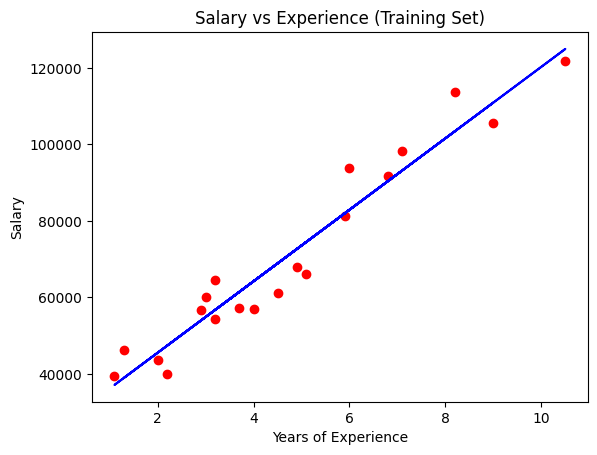

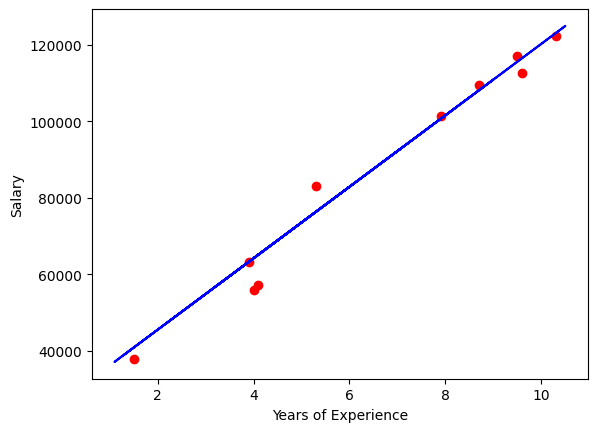

In [40]:

# Visualizing the Training results
plt.scatter(X_train[:,1], y_train, color = 'red')
# Paint in red the actual train values ​​as points
plt.plot(X_train[:,1], model.predict(X_train), color = 'blue')
# Paint in blue and in line form the prediction on my train values ​​since I apply the regression on those same train values, my model trained on those values
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

plt.scatter(X_test[:,1], y_test, color = 'red')
# Now paint the test points on the same model that I have built to validate it
plt.plot(X_train[:,1], model.predict(X_train), color = 'blue')
# Paint in blue and in line form the prediction on my train values ​​since I apply the regression on those same train values, my model trained on those valuesplt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()